In [1]:
import numpy as np
from utils import plot_values
from gridworld import GridworldEnv

In [2]:
# init the environment
env = GridworldEnv(shape=[4,4])

In [3]:
# check number of states and actions
print('Number of states in the environment:', env.nS)
print('Number of actions in the environment:', env.nA)

print('\nEnv:')
env._render(mode='human', close=False)

Number of states in the environment: 16
Number of actions in the environment: 4

Env:
T  o  o  o
o  o  o  o
o  o  o  x
o  o  o  T


In [4]:
def eval_policy(policy, env, discount_factor=1.0, epsilon=1e-5):
    
    # start with a random (all 0) value function
    V_old = np.zeros(env.nS)
    
    while True:
        
        # init new value function which is initially zeros
        V_new = np.zeros(env.nS)
        
        # stop condition
        delta = 0
        
        # loop over state space:
        for s in range(env.nS):
            
            # to accumulate Bellman expectation equation
            v_fn = 0
            
            # get probability distribution over actions
            action_probs = policy[s]
            
            # loop over possible actions
            for a in range(env.nA):
                
                # get transitions
                [(prob, next_state, reward, done)]  = env.P[s][a]
                
                # apply iterative update to every single state using Bellman expectation equation
                v_fn += action_probs[a] * (reward + discount_factor * V_old[next_state])
            
            # get the biggest difference over state space
            delta = max(delta, abs(v_fn - V_old[s]))
            
            # update state-value
            V_new[s] = v_fn
            
        # set the new value function
        V_old = V_new
        
        # if true value function
        if (delta < epsilon): break
            
    return np.array(V_old)

In [5]:
def improve_policy(env, discount_factor=1.0, policy_eval_fn=eval_policy):
    """
    Policy Improvement Algorithm. Iteratively evaluates and improves a policy
    until an optimal policy is found.
    
    Args:
        env: The OpenAI envrionment.
        policy_eval_fn: Policy Evaluation function that takes 3 arguments:
            policy, env, discount_factor.
        discount_factor: gamma discount factor.
        
    Returns:
        A tuple (policy, V). 
        policy is the optimal policy, a matrix of shape [S, A] where each state s
        contains a valid probability distribution over actions.
        V is the value function for the optimal policy.
       
    """
    
    def one_step_lookahed(s, value_fn):
        
        actions = np.zeros(env.nA)
        
        for a in range(env.nA):
            
            [(prob, next_state, reward, done)] = env.P[s][a]
            actions[a] = prob * (reward + discount_factor * value_fn[next_state])
            
        return actions
    
    # start with a random policy
    policy = np.ones([env.nS, env.nA]) / env.nA
    actions_values = np.zeros(env.nA)
    
    # calculate iteration needed to find the optimal policy
    iteration = 0
    
    while True:
        
        # evaluate the current policy
        value_fn = policy_eval_fn(policy, env)
        
        policy_stable = True
        
        # loop over state space
        for s in range(env.nS):
            
            # perform one step lookahead
            actions_values = one_step_lookahed(s, value_fn)
            
            # maximize over possible actions
            best_action = np.argmax(actions_values)
            
            # best action on current policy
            chosen_action = np.argmax(policy[s])
            
            # if Bellman optimality equation not satisfied
            if (best_action != chosen_action):
                policy_stable = False
                
            # the new policy after acting greedily w.r.t value function
            policy[s] = np.eye(env.nA)[best_action]
            
        iteration+=1
            
        # if Bellman optimality equation is satisfied
        if (policy_stable):
            return policy, value_fn, iteration

In [6]:
policy, v, iteration = improve_policy(env)
print(f'Policy Probability Distribution (after iteration {iteration}):')
print(policy)

Policy Probability Distribution (after iteration 3):
[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]


Reshaped Grid Policy (0=up, 1=right, 2=down, 3=left):


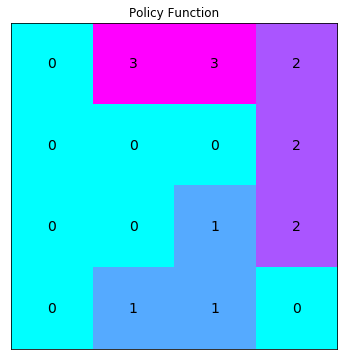

In [7]:
print('Reshaped Grid Policy (0=up, 1=right, 2=down, 3=left):')
plot_values(np.reshape(np.argmax(policy, axis=1), env.shape), name='Policy', shape=(4,4))

In [8]:
print('Value Function:')
print(v)

Value Function:
[ 0. -1. -2. -3. -1. -2. -3. -2. -2. -3. -2. -1. -3. -2. -1.  0.]


Reshaped Grid State-Value Function:


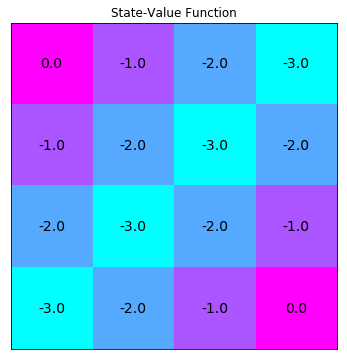

In [9]:
print('Reshaped Grid State-Value Function:')
plot_values(v.reshape(env.shape), name='State-Value', shape=(4,4))

---